In [1]:
import json
import matplotlib.pyplot as plt
import urllib.request as url
import pandas as pd

In [2]:
req = url.urlopen("https://api.covid19india.org/states_daily.json")

In [3]:
data = json.load(req)

In [4]:
states = pd.DataFrame(data['states_daily'])

In [5]:
states.shape

(1083, 42)

In [6]:
states.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [7]:
states['date'] = pd.to_datetime(states['date'])

In [8]:
states['dl'].astype('int32')

0         7
1         1
2         1
3         0
4         1
       ... 
1078    309
1079      3
1080    320
1081    234
1082      4
Name: dl, Length: 1083, dtype: int32

In [9]:
states['dl'] = states['dl'].astype('int32')
states['mh'] = states['mh'].astype('int32')
states['up'] = states['up'].astype('int32')
states['tt'] = states['tt'].astype('int32')

In [10]:
confirmed = states[states['status'] == 'Confirmed']
recovered = states[states['status'] == 'Recovered']
deceased = states[states['status'] == 'Deceased']

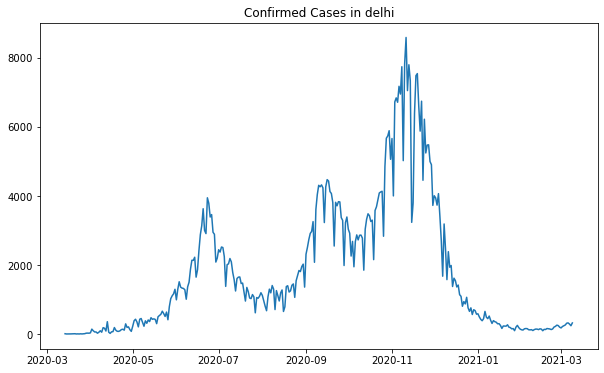

In [11]:
plt.figure(figsize=(10,6))
plt.plot(confirmed['date'], confirmed['dl'])
plt.title("Confirmed Cases in delhi")
plt.show()

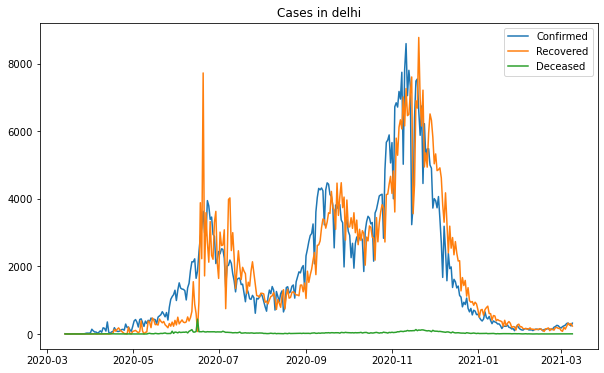

In [12]:
plt.figure(figsize=(10,6))
plt.plot(confirmed['date'], confirmed['dl'], label='Confirmed')
plt.plot(confirmed['date'], recovered['dl'], label='Recovered')
plt.plot(confirmed['date'], deceased['dl'], label='Deceased')
plt.title("Cases in delhi")
plt.legend()
plt.show()

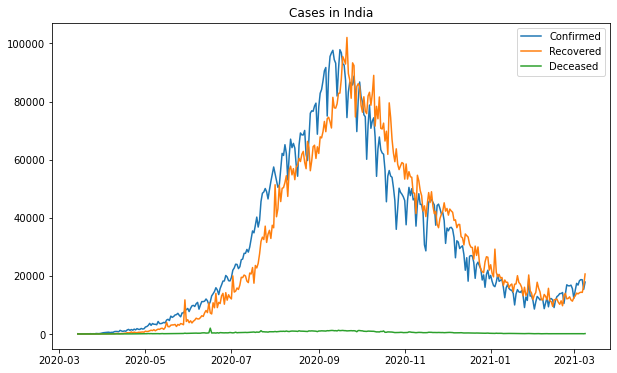

In [13]:
plt.figure(figsize=(10,6))
plt.plot(confirmed['date'], confirmed['tt'], label='Confirmed')
plt.plot(confirmed['date'], recovered['tt'], label='Recovered')
plt.plot(confirmed['date'], deceased['tt'], label='Deceased')
plt.title("Cases in India")
plt.legend()
plt.show()

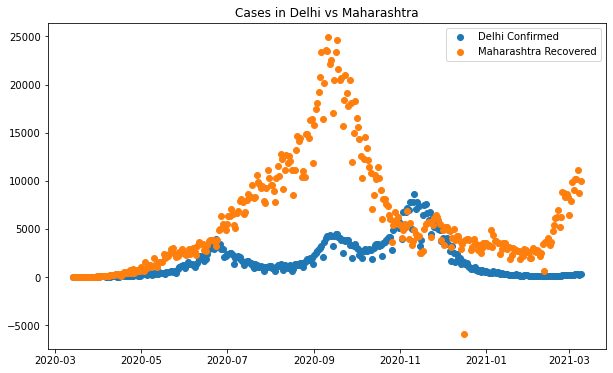

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed['date'], confirmed['dl'], label='Delhi Confirmed')
plt.scatter(confirmed['date'], confirmed['mh'], label='Maharashtra Recovered')
plt.title("Cases in Delhi vs Maharashtra")
plt.legend()
plt.show()

In [15]:
confirmed['month'] = pd.to_datetime(confirmed['date']).dt.month
confirmed['year'] = pd.to_datetime(confirmed['date']).dt.year
confirmed['week'] = pd.to_datetime(confirmed['date']).dt.week
confirmed['day'] = pd.to_datetime(confirmed['date']).dt.day
confirmed['qurter'] = pd.to_datetime(confirmed['date']).dt.quarter

<ipython-input-15-f34fe16b8903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed['month'] = pd.to_datetime(confirmed['date']).dt.month
<ipython-input-15-f34fe16b8903>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed['year'] = pd.to_datetime(confirmed['date']).dt.year
<ipython-input-15-f34fe16b8903>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  confirmed['week'] = pd.to_datetime(confirmed['date']).dt.wee

In [16]:
confirmed.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,tt,un,up,ut,wb,month,year,week,day,qurter
0,0,1,0,0,0,0,0,2020-03-14,2020-03-14,0,...,81,0,12,0,0,3,2020,11,14,1
3,0,0,0,0,0,0,0,2020-03-15,2020-03-15,0,...,27,0,1,0,0,3,2020,11,15,1
6,0,0,0,0,0,0,0,2020-03-16,2020-03-16,0,...,15,0,0,1,0,3,2020,12,16,1
9,0,0,0,0,0,0,0,2020-03-17,2020-03-17,0,...,11,0,2,0,1,3,2020,12,17,1
12,0,0,0,0,0,0,0,2020-03-18,2020-03-18,0,...,37,0,2,1,0,3,2020,12,18,1


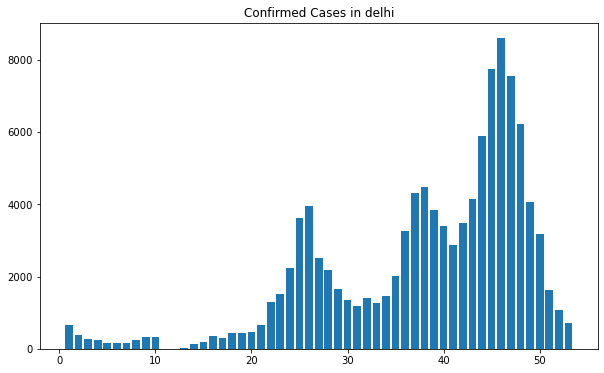

In [17]:
plt.figure(figsize=(10,6))
plt.bar(confirmed['week'], confirmed['dl'])
plt.title("Confirmed Cases in delhi")
plt.show()